<a href="https://colab.research.google.com/github/cwscx/makmore/blob/main/build_makemore_mlp_yay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [476]:
# from google.colab import files
# uploaded = files.upload()

In [477]:
words = open('names.txt', 'r').read().splitlines()

In [478]:
len(words)

32033

In [479]:
stoi = {c:i for i,c in enumerate('.abcdefghijklmnopqrstuvwxyz')}
itos = {i:c for i,c in enumerate(stoi)}
print(stoi)
print(itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [480]:
 block_size = 3 # context length: how many chars to take in for prediction
 X, Y = [], []
 for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    index = stoi[ch]
    X.append(context)
    Y.append(index)
    # print(''.join(itos[i] for i in context), '---->', itos[index])
    context = context[1:] + [index]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [577]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [582]:
def build_dataset(words) -> tuple[torch.Tensor, torch.Tensor]:
  block_size = 3 # context length: how many chars to take in for prediction
  X, Y = [], []
  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      index = stoi[ch]
      X.append(context)
      Y.append(index)
      context = context[1:] + [index]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

training_x, training_y = build_dataset(words[:n1])
dev_x, dev_y = build_dataset(words[n1:n2])
test_x, test_y = build_dataset(words[n2:])

In [482]:
C = torch.randn((27, 2))

In [483]:
embedding = C[X]
embedding.shape

torch.Size([228146, 3, 2])

In [484]:
W1 = torch.randn((6, 100)) # 100 nerouns
b1 = torch.rand((100))

In [485]:
torch.cat([embedding[:, 0, :], embedding[:, 1, :], embedding[:, 2, :]], 1).shape # torch.cat([32x2, 32x2, 32x2]) => [32x6]

torch.Size([228146, 6])

In [486]:
torch.concat(torch.unbind(embedding, 1), 1)

tensor([[ 0.7083,  1.1786,  0.7083,  1.1786,  0.7083,  1.1786],
        [ 0.7083,  1.1786,  0.7083,  1.1786,  1.0948, -0.5675],
        [ 0.7083,  1.1786,  1.0948, -0.5675, -0.5773, -1.2102],
        ...,
        [-2.7195, -0.2294, -2.7195, -0.2294,  0.4173,  0.2545],
        [-2.7195, -0.2294,  0.4173,  0.2545, -2.7195, -0.2294],
        [ 0.4173,  0.2545, -2.7195, -0.2294, -1.3340, -0.5447]])

In [487]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [488]:
a.view([3,3,2])

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [489]:
a.storage()  # one-direcional vector stored in memory

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [490]:
embedding.view(X.shape[0], 6) == torch.concat(torch.unbind(embedding, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

In [491]:
h = embedding.view(X.shape[0],6) @ W1 + b1

In [492]:
 W2 = torch.randn((100, 27))
 b2 = torch.randn(27)

In [493]:
logits = h @ W2 + b2
count = logits.exp()
probs = count / count.sum(dim=1, keepdims=True)

In [494]:
probs.shape

torch.Size([228146, 27])

In [495]:
probs[torch.arange(X.shape[0]), Y]

tensor([1.3270e-19, 5.3781e-27, 1.9518e-19,  ..., 0.0000e+00, 0.0000e+00,
        8.9999e-29])

In [496]:
loss = -probs[torch.arange(X.shape[0]), Y].log().mean()
loss

tensor(nan)

In [585]:
training_x.shape, training_y.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [539]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [655]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 15), generator=g, requires_grad=True)
W1 = torch.randn((45, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)
W2 = torch.randn((200, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]
losses = []
loglosses = []
steps = []

In [657]:
# for lr in lrs:
for i in range(200000):
  ## minibatch construct.
  ## randomly pick rows to iterate
  index = torch.randint(0, training_x.shape[0], (64,))

  ## Forward
  emb = C[training_x[index]]
  h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
  logits = h @ W2 + b2
  ### The following is exactly the same as cross entropy
  # counts = logits.exp()
  # probs = counts / counts.sum(dim=1, keepdim=True)
  # loss =  -probs[torch.arange(len(X)), Y].log().mean()
  ###
  loss = F.cross_entropy(logits, training_y[index])

  for p in parameters:
    p.grad = None

  ## Backward
  loss.backward()

  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
     p.data += -lr * p.grad

  losses.append(loss.item())
  loglosses.append(loss.log10().item())
  steps.append(i)

print(loss.item())

1.8208063840866089


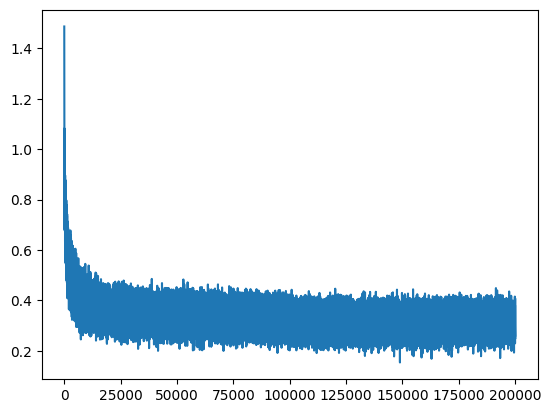

In [658]:
plt.plot(steps, loglosses)

In [660]:
emb = C[training_x]

h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, training_y)
print(loss)


tensor(2.0751, grad_fn=<NllLossBackward0>)


In [661]:
emb = C[dev_x]

h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, dev_y)
print(loss)


tensor(2.1404, grad_fn=<NllLossBackward0>)


In [644]:
# training: 80%
# dev/validatin split (use to test hyer param: size of of a layer): 10%
# test split: 10%
#
# if the training set loss is roughly the same as dev/test set. Then it means
# it is under fit. (nueral net too small). Should increase the size of NN.


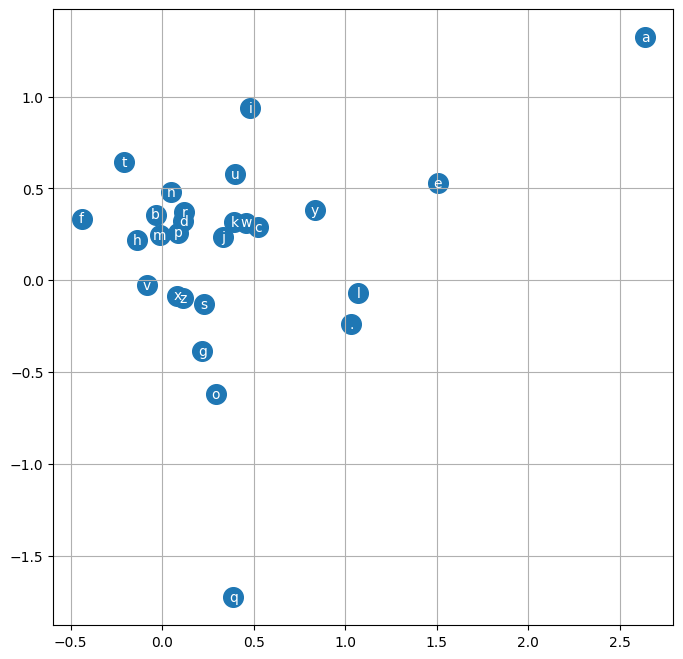

In [662]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [ ]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor(context)]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits)
    index = torch.multinomial(probs, 1, generator=g).item()
    context = context[1:] + [index]
    out.append(index)
    if (index == 0):
      break

  print(''.join(itos[i] for i in out))